In [9]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report



In [10]:
# Load the dataset
hotel_data = pd.read_csv("hotel_bookings.csv")



In [11]:
# Data Understanding
print(hotel_data.head())  # Check the first few rows
print(hotel_data.info())  # Get information about the dataset



          hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  ...  deposit_type  \
0                        0                     0       2  ...    No Deposit   
1     

In [13]:
# Data Cleaning
hotel_data.dropna(inplace=True)  # Drop rows with missing values
hotel_data.drop_duplicates(inplace=True)  # Remove duplicate entries



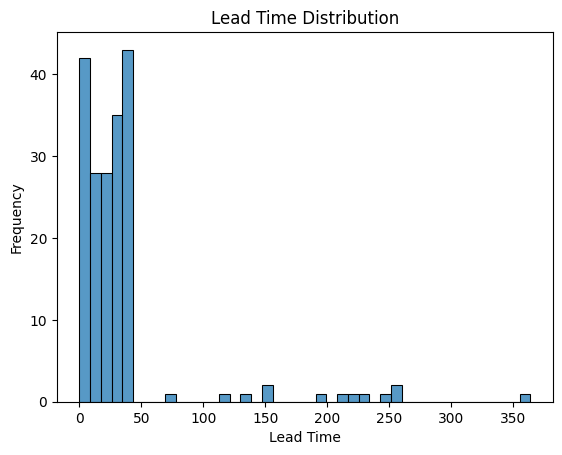

In [14]:
# Exploratory Data Analysis (EDA)
# Example visualizations
sns.histplot(hotel_data['lead_time'])
plt.title('Lead Time Distribution')
plt.xlabel('Lead Time')
plt.ylabel('Frequency')
plt.show()



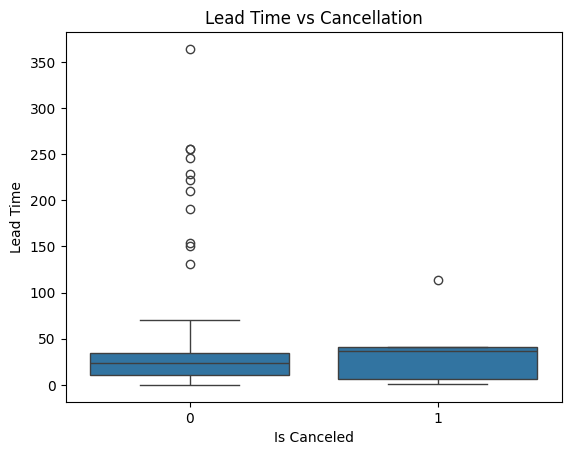

In [15]:
sns.boxplot(x='is_canceled', y='lead_time', data=hotel_data)
plt.title('Lead Time vs Cancellation')
plt.xlabel('Is Canceled')
plt.ylabel('Lead Time')
plt.show()



In [16]:
# Feature Engineering
# Example: Encoding categorical variables
label_encoder = LabelEncoder()
hotel_data['hotel_encoded'] = label_encoder.fit_transform(hotel_data['hotel'])
hotel_data['reservation_status_encoded'] = label_encoder.fit_transform(hotel_data['reservation_status'])



In [17]:
# Modeling and Prediction
# Example: Predicting cancellation
month_to_number = {'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6, 'July': 7, 'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December': 12}
hotel_data['arrival_date_month_encoded'] = hotel_data['arrival_date_month'].map(month_to_number)




In [18]:
X = hotel_data[['lead_time', 'arrival_date_month_encoded', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'previous_cancellations', 'booking_changes', 'days_in_waiting_list', 'adr', 'total_of_special_requests', 'hotel_encoded']]
y = hotel_data['is_canceled']



In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [20]:
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_test)



In [21]:
# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))



Accuracy: 0.9210526315789473
Classification Report:
               precision    recall  f1-score   support

           0       0.92      1.00      0.96        34
           1       1.00      0.25      0.40         4

    accuracy                           0.92        38
   macro avg       0.96      0.62      0.68        38
weighted avg       0.93      0.92      0.90        38



In [22]:
# Insights and Recommendations
# Example: Analyze feature importance
feature_importance = rf_classifier.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
print(importance_df)

# Provide recommendations based on analysis
# Example: Suggest strategies for minimizing cancellations

                       Feature  Importance
0                    lead_time    0.234614
10                         adr    0.179598
2      stays_in_weekend_nights    0.133047
8              booking_changes    0.127811
3         stays_in_week_nights    0.106667
4                       adults    0.087228
1   arrival_date_month_encoded    0.084427
5                     children    0.027197
12               hotel_encoded    0.012752
11   total_of_special_requests    0.006531
7       previous_cancellations    0.000126
6                       babies    0.000000
9         days_in_waiting_list    0.000000
